# Lead Score Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

# Goals of the Case Study

There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [321]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
#setting option to display max rows
pd.set_option('display.max_columns',100)

In [3]:
#imporing the dataset
leads=pd.read_csv('Leads.csv')

In [4]:
#checking and displaying the frist five rows
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#displaying the shape of the dataset
leads.shape

(9240, 37)

In [6]:
#checking the dtypes of the cols present in the dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#leads['Prospect ID'].is_unique
leads['Prospect ID'].duplicated().any()

False

In [8]:
leads[leads['Lead Number'].duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


# Exploratory Data Analysis

Data Cleaning and Treatment

In [9]:
#dropping the below cols as there are no duplicates
leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [10]:
#replcaing the values with null if the cols is having value as 'select'
leads=leads.replace('Select',np.NaN)

In [11]:
#cheking the null values in the cols of the dataset'
round(100*(leads.isnull().sum())/len(leads.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
#dropping the cols having null vlaue greater than 40%
leads=leads.loc[:,100*(leads.isnull().sum())/len(leads.index)<=45]

In [13]:
#checking the null percentage after dropping the cols >45%of null values
round(100*leads.isnull().sum()/len(leads.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

# Categorical feature analysis

In [14]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Germany                    4
Kuwait                     4
South Africa               4
Canada                     4
Sweden                     3
Bangladesh                 2
Italy                      2
Belgium                    2
Asia/Pacific Region        2
Netherlands                2
Uganda                     2
Ghana                      2
China                      2
Philippines                2
Kenya                      1
Tanzania                   1
Liberia                    1
Russia                     1
Indonesia                  1
Malaysia      

In [15]:
#replacing the null with mode as it's a categorical variable
leads['Country']=leads['Country'].fillna(leads['Country'].mode()[0])

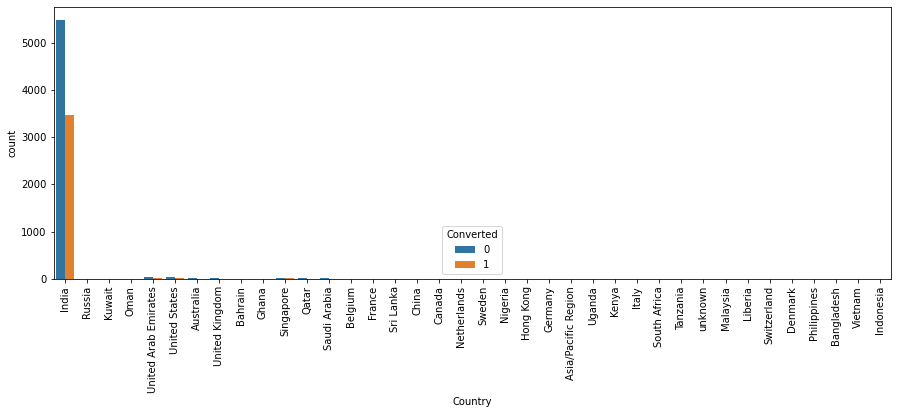

In [16]:
plt.figure(figsize=[15,5])
graph=sns.countplot(leads['Country'],hue=leads['Converted'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.show()

Since we can see the around 96% of the value in the country is India , it won't be useful for our analysis, hence we are adding this col to the list of cols to be dropped.

In [17]:
leads['Country'].value_counts(normalize=True)

India                   0.968939
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
France                  0.000649
Oman                    0.000649
unknown                 0.000541
Nigeria                 0.000433
Germany                 0.000433
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Sweden                  0.000325
China                   0.000216
Italy                   0.000216
Asia/Pacific Region     0.000216
Belgium                 0.000216
Netherlands             0.000216
Ghana                   0.000216
Bangladesh              0.000216
Philippines             0.000216
Uganda                  0.000216
Tanzania                0.000108
Sri Lanka               0.000108
Russia    

In [18]:
#adding the 'country' col to the drop_cols list
drop_cols=['Country']

In [19]:
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

We cansee that most of the specializations are coming under managment specialization so it would be better to club these under managment itself which wil help us in analysing better

In [20]:
leads['Specialization']=leads['Specialization'].replace(['Retail Management','Hospitality Management','Healthcare Management','Supply Chain Management',
                                                         'IT Projects Management','Operations Management','Marketing Management','Human Resource Management','Finance Management'],'Management')

In [21]:
#replcaing the null value in the specialization with not selected as the user might not have selected any of the specilization 
leads['Specialization']=leads['Specialization'].replace(np.NaN,'Not Selected')

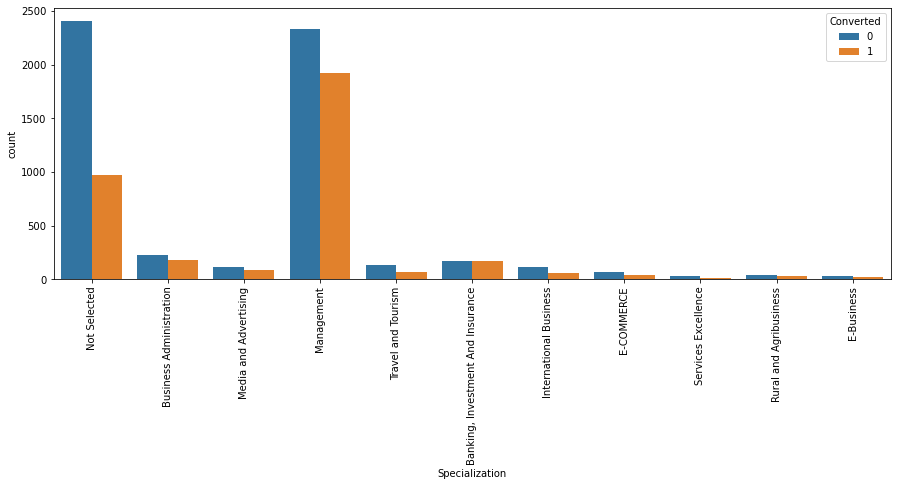

In [22]:
plt.figure(figsize=[15,5])
graph=sns.countplot(leads['Specialization'],hue=leads['Converted'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.show()

We can see now that Management specialization users are having highest no of leads converted.

In [23]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
#replcaing the null value with the mode
leads['What is your current occupation']=leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0])

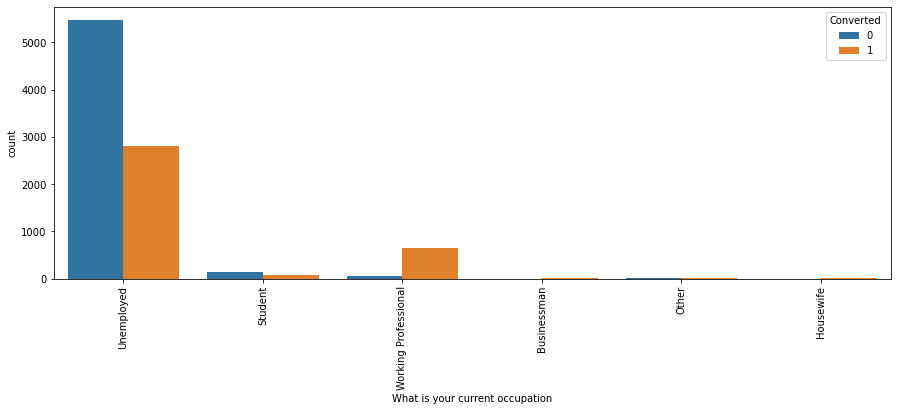

In [25]:
plt.figure(figsize=[15,5])
graph=sns.countplot(leads['What is your current occupation'],hue=leads['Converted'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.show()

Working prfofessionals have though low no but their conversion rate is higher.Aslo the unemployed are highest in terms of numbers

In [26]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
#replacing the null with the mode
leads['What matters most to you in choosing a course']=leads['What matters most to you in choosing a course'].fillna(leads['What matters most to you in choosing a course'].mode()[0])

In [28]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)

Better Career Prospects      0.999675
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

WE can see that 99% of the valye in the above col is Better Career Prospects which won't be useful in our analysis

In [29]:
drop_cols.append('What matters most to you in choosing a course')
drop_cols

['Country', 'What matters most to you in choosing a course']

In [30]:
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [31]:
#from the understanding it seems that here also null are not selected by user hence we can convert it to not selected
leads['Tags']=leads['Tags'].replace(np.NaN,'Not Selected')

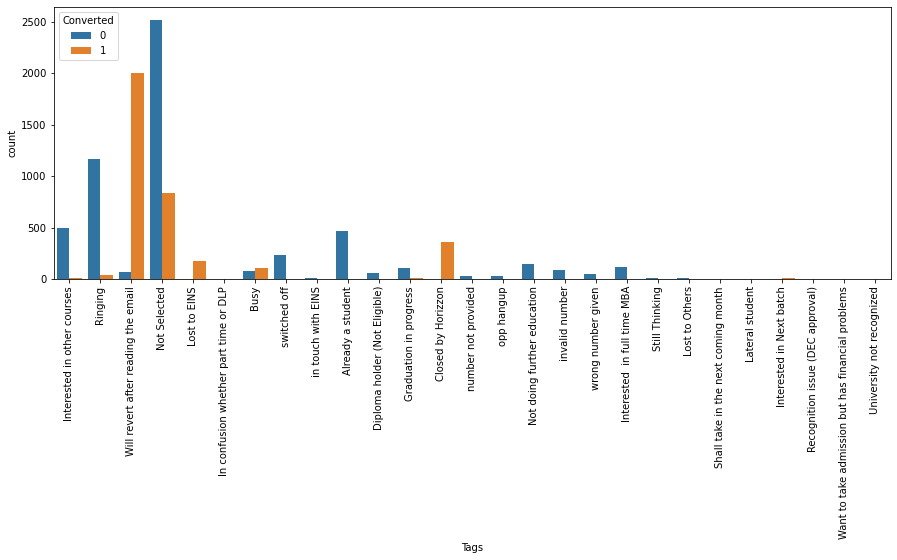

In [32]:
plt.figure(figsize=[15,5])
graph=sns.countplot(leads['Tags'],hue=leads['Converted'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.show()

We can see that there are tags which are very low converted rate and it is better to club these tags in other_tags,
which will help us to reduce the levels and also help in our analysis.

In [33]:
leads['Tags']=leads['Tags'].replace(['Recognition issue (DEC approval)','University not recognized','Shall take in the next coming month'
                                    ,'Lateral student','In confusion whether part time or DLP','Interested in Next batch',
                                    'Want to take admission but has financial problems','Still Thinking','Lost to Others',
                                    'in touch with EINS','number not provided','opp hangup','wrong number given','Diploma holder (Not Eligible)',
                                    'invalid number','Graduation in progress','Interested  in full time MBA','Already a student',
                                    'switched off','Not doing further education'],'other_tags')

In [34]:
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [35]:
leads['City']=leads['City'].fillna(leads['City'].mode()[0])

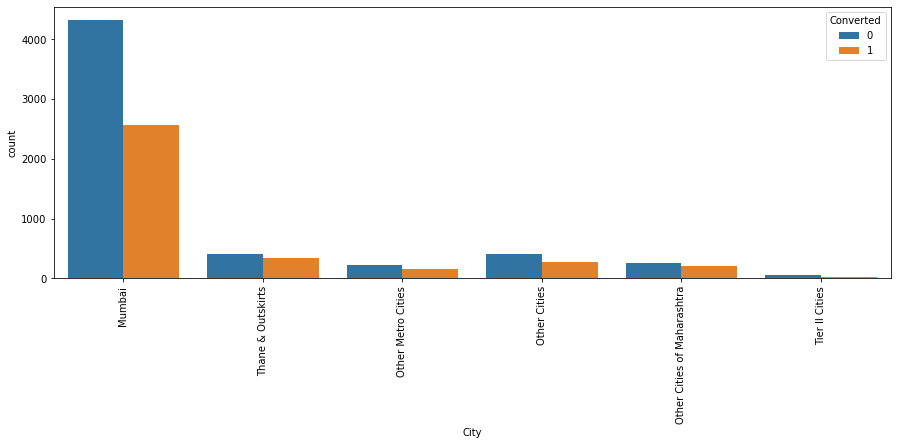

In [36]:
plt.figure(figsize=[15,5])
graph=sns.countplot(leads['City'],hue=leads['Converted'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.show()

In [37]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
NC_EDM                  1
testone                 1
blog                    1
WeLearn                 1
youtubechannel          1
Pay per Click Ads       1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [38]:
leads['Lead Source']=leads['Lead Source'].fillna('other_source')
leads['Lead Source']=leads['Lead Source'].replace('google','Google')
leads['Lead Source']=leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source']=leads['Lead Source'].replace(['bing','Click2call','Press_Release','blog',
                                                   'Pay per Click Ads','testone','NC_EDM','welearnblog_Home',
                                                   'youtubechannel','WeLearn'],'other_source')

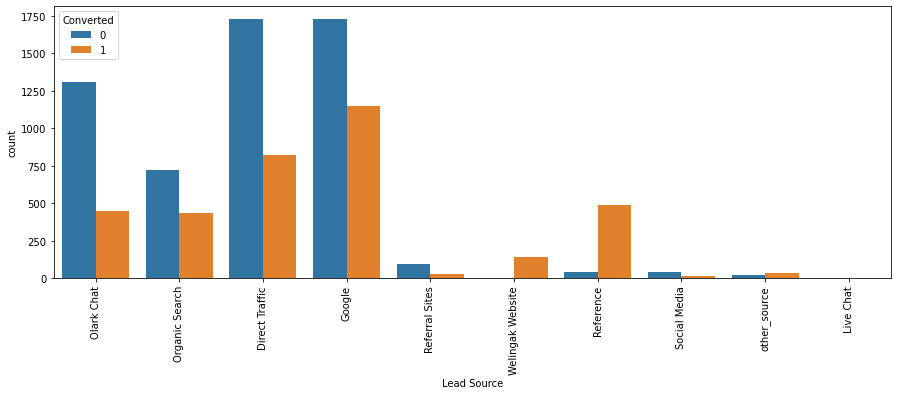

In [39]:
plt.figure(figsize=[15,5])
graph=sns.countplot(leads['Lead Source'],hue=leads['Converted'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.show()

From the above graph it is observed that:                                                                                       
Google and Direct Traffice has the most number of converted users.                                                             
The conversion rate through Reference and Welingak Website is high.                                                             
The company should focus in it's live chat,referal sites to improve it's conversion rate.                                       

In [40]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [41]:
leads['Last Activity']=leads['Last Activity'].fillna('other_activity')
leads['Last Activity']=leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation',
                                                      'Approached upfront','View in browser link Clicked',
                                                      'View in browser link Clicked','Email Marked Spam',
                                                      'Email Received','Visited Booth in Tradeshow',
                                                      'Resubscribed to emails'],'other_activity')

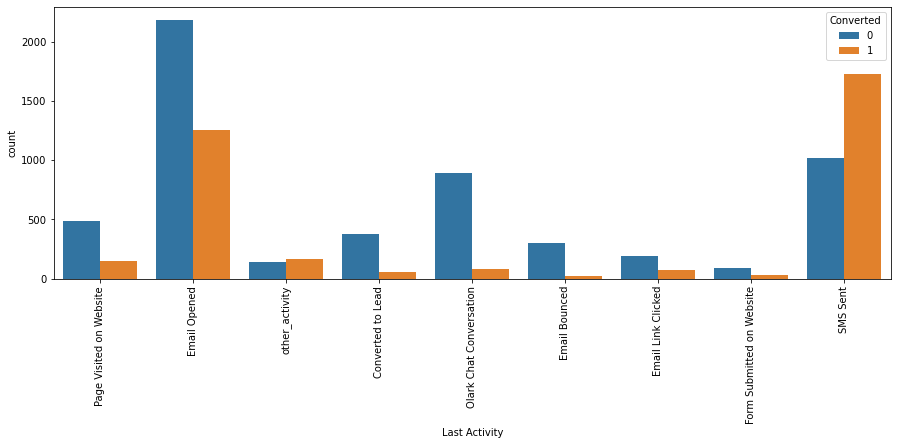

In [42]:
plt.figure(figsize=[15,5])
graph=sns.countplot(leads['Last Activity'],hue=leads['Converted'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.show()

In [43]:
#checking the null after the fillign the null for all categorical cols:
round(100*leads.isnull().sum()/len(leads.index),2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

we can see that almost all of the columns arehaving 0% of null and the columns having null vlaues are less than 2% so we can drop 
the these rows.

In [44]:
leads=leads.dropna()

In [45]:
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

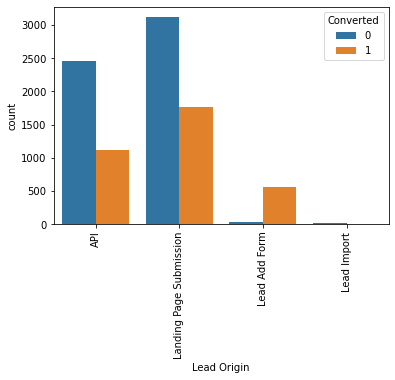

In [46]:
graph=sns.countplot(leads['Lead Origin'],hue=leads['Converted'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.show()

From the above graph we can see that:  
Api and Landing Page Submission has the highest no of leads adn also higher rate of conversion.                                  Lead Add Form has low no of leads comparitvely however the concersion rate seems to be pretty high.                              Hence compan should focus on the above factors to have even higher conversion rates.

In [47]:
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

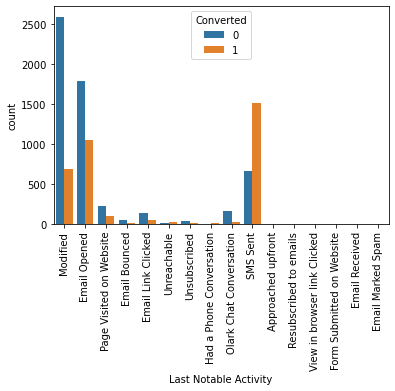

In [48]:
graph=sns.countplot(leads['Last Notable Activity'],hue=leads['Converted'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.show()

We can club the values with lower frequency in a other_last_notable_activity.

In [49]:
leads['Last Notable Activity']=leads['Last Notable Activity'].replace(['Approached upfront','Resubscribed to emails','Form Submitted on Website',
                                                                      'Email Received','View in browser link Clicked','Email Marked Spam',
                                                                      'Had a Phone Conversation','Unreachable','Unsubscribed','Email Bounced'],'other_last_notable_activity')

In [50]:
leads['Do Not Email'].value_counts(dropna=False,normalize=True)

No     0.920466
Yes    0.079534
Name: Do Not Email, dtype: float64

In [51]:
leads['Do Not Call'].value_counts(dropna=False,normalize=True)

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

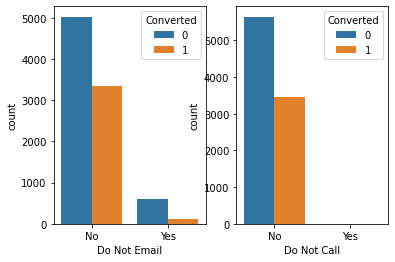

In [52]:
plt.subplot(1,2,1)
graph1=sns.countplot(leads['Do Not Email'],hue=leads['Converted'])

plt.subplot(1,2,2)
graph2=sns.countplot(leads['Do Not Call'],hue=leads['Converted'])

From the above graph we can see that percentage of 'yes' in 'Do Not Call' is significantly low and it makes the variable imbalance 
hence it is bette to add this variable in drop_col list

In [53]:
drop_cols.append('Do Not Call')
drop_cols

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [54]:
leads['Search'].value_counts(dropna=False,normalize=True)

No     0.998462
Yes    0.001538
Name: Search, dtype: float64

In [55]:
leads['Magazine'].value_counts(dropna=False,normalize=True)

No    1.0
Name: Magazine, dtype: float64

In [56]:
leads['Newspaper Article'].value_counts(dropna=False,normalize=True)

No     0.99978
Yes    0.00022
Name: Newspaper Article, dtype: float64

In [57]:
leads['X Education Forums'].value_counts(dropna=False,normalize=True)

No     0.99989
Yes    0.00011
Name: X Education Forums, dtype: float64

In [58]:
leads['Newspaper'].value_counts(dropna=False,normalize=True)

No     0.99989
Yes    0.00011
Name: Newspaper, dtype: float64

In [59]:
leads['Digital Advertisement'].value_counts(dropna=False,normalize=True)

No     0.999561
Yes    0.000439
Name: Digital Advertisement, dtype: float64

In [60]:
leads['Through Recommendations'].value_counts(dropna=False,normalize=True)

No     0.999231
Yes    0.000769
Name: Through Recommendations, dtype: float64

In [61]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False,normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [62]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False,normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [63]:
leads['Get updates on DM Content'].value_counts(dropna=False,normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [64]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False,normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [65]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False,normalize=True)

No     0.682742
Yes    0.317258
Name: A free copy of Mastering The Interview, dtype: float64

In [66]:
drop_cols.extend(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content',
                 'Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement',
                 'Newspaper','X Education Forums','Newspaper Article','Magazine','Search'])
drop_cols

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Through Recommendations',
 'Digital Advertisement',
 'Newspaper',
 'X Education Forums',
 'Newspaper Article',
 'Magazine',
 'Search']

In [67]:
leads=leads.drop(drop_cols,axis=1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

# Checking the balance for target column

In [68]:
#checking the percentage of '1's in our target variable:
round(100*leads['Converted'].sum()/len(leads['Converted'].index),2)

38.02

# Numerical feature analysis

Checking for outliers in datset and it's treatment for numerical features.

In [69]:
#checking summary for 'TotlVisits' col:
leads['TotalVisits'].describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:ylabel='TotalVisits'>

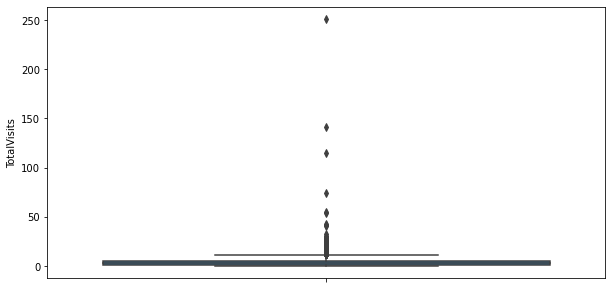

In [70]:
#building the boxplot to check the outliers:
plt.figure(figsize=[10,5])
sns.boxplot(y=leads['TotalVisits'])

In [71]:
#treating stasticl outliers:
q1=leads['TotalVisits'].quantile(0.05)
q3=leads['TotalVisits'].quantile(0.95)
IQR=q3-q1
leads1=leads[(leads['TotalVisits']>=q1-1.5*IQR) & (leads['TotalVisits']<=q3+1.5*IQR)]

<AxesSubplot:ylabel='TotalVisits'>

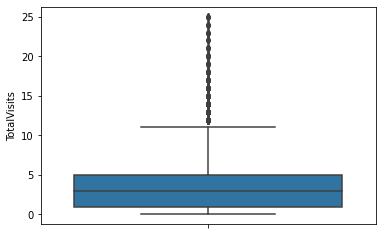

In [72]:
sns.boxplot(y=leads1['TotalVisits'])

In [73]:
#checking the shape of the dataset
leads1.shape

(9081, 14)

In [75]:
leads1['Total Time Spent on Website'].describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99])

count    9081.000000
mean      481.476599
std       545.363843
min         0.000000
5%          0.000000
25%         8.000000
50%       244.000000
75%       920.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:ylabel='Total Time Spent on Website'>

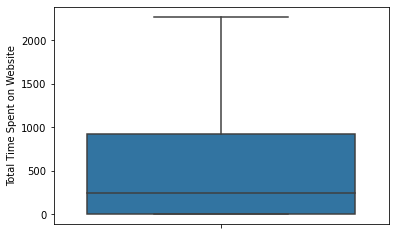

In [76]:
sns.boxplot(y=leads1['Total Time Spent on Website'])

We don't see any major outlier present in the 'Total Time Spent on Website' cols as the value consistently.
Hence no outlier treatmentis requireed for this variable

In [77]:
leads1['Page Views Per Visit'].describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99])

count    9081.000000
mean        2.350098
std         2.078922
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
95%         6.000000
99%         9.000000
max        24.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:ylabel='Page Views Per Visit'>

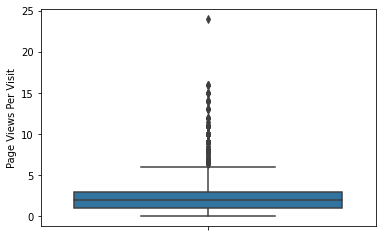

In [78]:
sns.boxplot(y=leads1['Page Views Per Visit'])

In [80]:
#treating the outliers 
q1=leads1['Page Views Per Visit'].quantile(0.05)
q3=leads1['Page Views Per Visit'].quantile(0.95)
IQR=q3-q1
leads1=leads1[(leads1['Page Views Per Visit']>q1-1.5*IQR) & (leads1['Page Views Per Visit']<q3+1.5*IQR)]

<AxesSubplot:ylabel='Page Views Per Visit'>

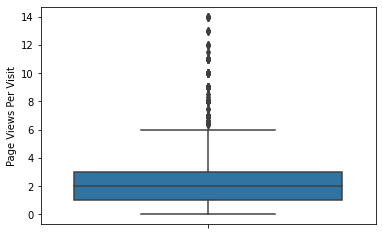

In [82]:
sns.boxplot(y=leads1['Page Views Per Visit'])

# Bivariate-Analysis

<AxesSubplot:>

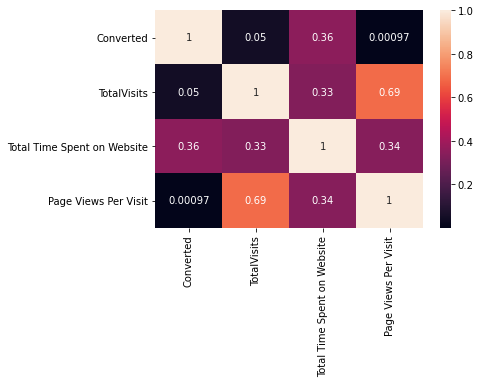

In [88]:
#plotting the heatmap
sns.heatmap(leads1.corr(),annot=True)

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

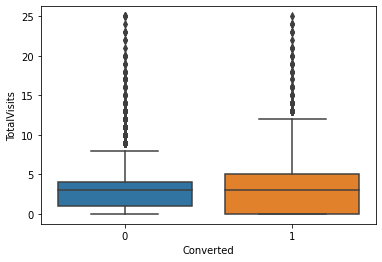

In [91]:
#plotting the boxplot for the continous variable w.r.t target variable
sns.boxplot(data=leads1,x='Converted',y='TotalVisits')

We can see that median or  50% of the converted leads and non-converted leads are same

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

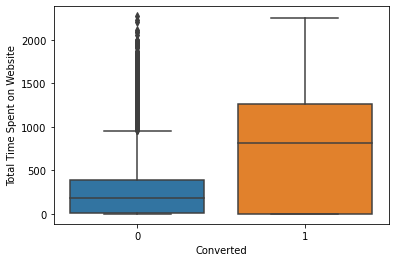

In [92]:
sns.boxplot(data=leads1,x='Converted',y='Total Time Spent on Website')

From the above plot we can see that median of the leads who are sending more time on the websites are getting converted more.

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

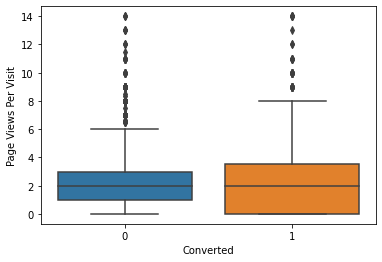

In [93]:
sns.boxplot(data=leads1,x='Converted',y='Page Views Per Visit')

From the above plot we can see that median of the converted leads and non-converted leads due to 'Page Views Per Visit' is same.

In [100]:
leads1[['A free copy of Mastering The Interview','Do Not Email']]=leads1[['A free copy of Mastering The Interview','Do Not Email']].apply(lambda x:x.map({'Yes':1,'No':0}))

In [101]:
leads1['Do Not Email'].value_counts()

0    8360
1     713
Name: Do Not Email, dtype: int64

In [111]:
leads1['What is your current occupation'].value_counts()

Unemployed              8156
Working Professional     678
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

# Creating dummy variable

In [117]:
dummy1=pd.get_dummies(leads1[['Lead Origin','What is your current occupation','City']],drop_first=True)
leads1=pd.concat([leads1,dummy1],axis=1)
leads1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Selected,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,other_activity,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Selected,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0


In [124]:
#creating dummies for the variable Lead Source and dropping the variable which we created by combining the low frequency values
dummy1=pd.get_dummies(leads1['Lead Source'],prefix='Lead Source_')
dummy1=dummy1.drop('Lead Source__other_source',axis=1)
leads1=pd.concat([leads1,dummy1],axis=1)
leads1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source__Direct Traffic,Lead Source__Google,Lead Source__Live Chat,Lead Source__Olark Chat,Lead Source__Organic Search,Lead Source__Reference,Lead Source__Referral Sites,Lead Source__Social Media,Lead Source__Welingak Website
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Selected,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,other_activity,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Selected,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [127]:
#creating dummies for the variable Last Activity and dropping the variable which we created by combining the low frequency values
dummy1=pd.get_dummies(leads1['Last Activity'],prefix='Last Activity_')
dummy1=dummy1.drop('Last Activity__other_activity',axis=1)
leads1=pd.concat([leads1,dummy1],axis=1)
leads1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source__Direct Traffic,Lead Source__Google,Lead Source__Live Chat,Lead Source__Olark Chat,Lead Source__Organic Search,Lead Source__Reference,Lead Source__Referral Sites,Lead Source__Social Media,Lead Source__Welingak Website,Last Activity__Converted to Lead,Last Activity__Email Bounced,Last Activity__Email Link Clicked,Last Activity__Email Opened,Last Activity__Form Submitted on Website,Last Activity__Olark Chat Conversation,Last Activity__Page Visited on Website,Last Activity__SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Selected,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,other_activity,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Selected,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [129]:
#creating dummies for the variable Specialization and dropping the variable which we created by combining the low frequency values
dummy1=pd.get_dummies(leads1['Specialization'],prefix='Specialization_')
dummy1=dummy1.drop('Specialization__Not Selected',axis=1)
leads1=pd.concat([leads1,dummy1],axis=1)
leads1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source__Direct Traffic,Lead Source__Google,Lead Source__Live Chat,Lead Source__Olark Chat,Lead Source__Organic Search,Lead Source__Reference,Lead Source__Referral Sites,Lead Source__Social Media,Lead Source__Welingak Website,Last Activity__Converted to Lead,Last Activity__Email Bounced,Last Activity__Email Link Clicked,Last Activity__Email Opened,Last Activity__Form Submitted on Website,Last Activity__Olark Chat Conversation,Last Activity__Page Visited on Website,Last Activity__SMS Sent,"Specialization__Banking, Investment And Insurance",Specialization__Business Administration,Specialization__E-Business,Specialization__E-COMMERCE,Specialization__International Business,Specialization__Management,Specialization__Media and Advertising,Specialization__Rural and Agribusiness,Specialization__Services Excellence,Specialization__Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Selected,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,other_activity,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Selected,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
#creating dummies for the variable Tags and dropping the variable which we created by combining the low frequency values
dummy1=pd.get_dummies(leads1['Tags'],prefix='Tags_')
dummy1=dummy1.drop('Tags__other_tags',axis=1)
leads1=pd.concat([leads1,dummy1],axis=1)
leads1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source__Direct Traffic,Lead Source__Google,Lead Source__Live Chat,Lead Source__Olark Chat,Lead Source__Organic Search,Lead Source__Reference,Lead Source__Referral Sites,Lead Source__Social Media,Lead Source__Welingak Website,Last Activity__Converted to Lead,Last Activity__Email Bounced,Last Activity__Email Link Clicked,Last Activity__Email Opened,Last Activity__Form Submitted on Website,Last Activity__Olark Chat Conversation,Last Activity__Page Visited on Website,Last Activity__SMS Sent,"Specialization__Banking, Investment And Insurance",Specialization__Business Administration,Specialization__E-Business,Specialization__E-COMMERCE,Specialization__International Business,Specialization__Management,Specialization__Media and Advertising,Specialization__Rural and Agribusiness,Specialization__Services Excellence,Specialization__Travel and Tourism,Tags__Busy,Tags__Closed by Horizzon,Tags__Interested in other courses,Tags__Lost to EINS,Tags__Not Selected,Tags__Ringing,Tags__Will revert after reading the email
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Selected,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,other_activity,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Selected,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [133]:
#creating dummies for the variable Last Notable Activity and dropping the variable which we created by combining the low frequency values
dummy1=pd.get_dummies(leads1['Last Notable Activity'],prefix='Last Notable Activity_')
dummy1=dummy1.drop('Last Notable Activity__other_last_notable_activity',axis=1)
leads1=pd.concat([leads1,dummy1],axis=1)
leads1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source__Direct Traffic,Lead Source__Google,Lead Source__Live Chat,Lead Source__Olark Chat,Lead Source__Organic Search,Lead Source__Reference,Lead Source__Referral Sites,Lead Source__Social Media,Lead Source__Welingak Website,Last Activity__Converted to Lead,Last Activity__Email Bounced,Last Activity__Email Link Clicked,Last Activity__Email Opened,Last Activity__Form Submitted on Website,Last Activity__Olark Chat Conversation,Last Activity__Page Visited on Website,Last Activity__SMS Sent,"Specialization__Banking, Investment And Insurance",Specialization__Business Administration,Specialization__E-Business,Specialization__E-COMMERCE,Specialization__International Business,Specialization__Management,Specialization__Media and Advertising,Specialization__Rural and Agribusiness,Specialization__Services Excellence,Specialization__Travel and Tourism,Tags__Busy,Tags__Closed by Horizzon,Tags__Interested in other courses,Tags__Lost to EINS,Tags__Not Selected,Tags__Ringing,Tags__Will revert after reading the email,Last Notable Activity__Email Link Clicked,Last Notable Activity__Email Opened,Last Notable Activity__Modified,Last Notable Activity__Olark Chat Conversation,Last Notable Activity__Page Visited on Website,Last Notable Activity__SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Selected,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,other_activity,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Selected,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [140]:
obj_drop=leads1.select_dtypes(include=['object']).columns

In [142]:
obj_drop

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [144]:
#dropping the object dtypes for which we have dummy variables created
leads1=leads1.drop(obj_drop,axis=1)

# Splitting the train-test dataset

In [146]:
y=leads1['Converted']
X=leads1.drop('Converted',axis=1)

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [153]:
y_train.head()

7112    0
4743    1
7987    1
1284    0
7345    0
Name: Converted, dtype: int64

In [151]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 7112 to 5751
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6351 non-null   int64  
 1   TotalVisits                                           6351 non-null   float64
 2   Total Time Spent on Website                           6351 non-null   int64  
 3   Page Views Per Visit                                  6351 non-null   float64
 4   A free copy of Mastering The Interview                6351 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6351 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6351 non-null   uint8  
 7   Lead Origin_Lead Import                               6351 non-null   uint8  
 8   What is your current occupation_Housewife             6

In [156]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source__Direct Traffic,Lead Source__Google,Lead Source__Live Chat,Lead Source__Olark Chat,Lead Source__Organic Search,Lead Source__Reference,Lead Source__Referral Sites,Lead Source__Social Media,Lead Source__Welingak Website,Last Activity__Converted to Lead,Last Activity__Email Bounced,Last Activity__Email Link Clicked,Last Activity__Email Opened,Last Activity__Form Submitted on Website,Last Activity__Olark Chat Conversation,Last Activity__Page Visited on Website,Last Activity__SMS Sent,"Specialization__Banking, Investment And Insurance",Specialization__Business Administration,Specialization__E-Business,Specialization__E-COMMERCE,Specialization__International Business,Specialization__Management,Specialization__Media and Advertising,Specialization__Rural and Agribusiness,Specialization__Services Excellence,Specialization__Travel and Tourism,Tags__Busy,Tags__Closed by Horizzon,Tags__Interested in other courses,Tags__Lost to EINS,Tags__Not Selected,Tags__Ringing,Tags__Will revert after reading the email,Last Notable Activity__Email Link Clicked,Last Notable Activity__Email Opened,Last Notable Activity__Modified,Last Notable Activity__Olark Chat Conversation,Last Notable Activity__Page Visited on Website,Last Notable Activity__SMS Sent
7112,0,0.511234,-0.578981,1.308403,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4743,0,-0.401656,1.873785,-0.165577,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
7987,0,0.511234,2.014727,0.080087,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1284,0,-0.097360,0.014076,-0.411240,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
7345,0,0.206937,-0.139679,0.817077,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [155]:
#Standard Scaling the integer and float cols:
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [164]:
#building the first model:
logr1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6292
Model Family:                Binomial   Df Model:                           58
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1174.2
Date:                Fri, 25 Jun 2021   Deviance:                       2348.4
Time:                        11:20:27   Pearson chi2:                 1.07e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.1205      2.106     -2.431      0.015      -9.249      -0.992
Do Not Email                                            -0.9124      0.316     -2.891      0.004      -1.531      -0.294
TotalVisits                                              0.2275      0.079      2.895      0.004       0.073       0.382
Total Time Spent on Website                              1.0695      0.064     16.810      0.000       0.945       1.194
Page Views Per Visit                                    -0.1780      0.088     -2.033      0.042      -0.350      -0.006
A free copy of Mastering The Interview                  -0.2077      0.183     -1.137      0.255      -0.566       0.150
Lead Origin_Landing Page Submission                     -0.7590      0.248     -3.061      0.002      -1.245      -0.273
Lead Origin_Lead Add Form                                2.3017      1.386      1.661      0.097      -0.415       5.018
Lead Origin_Lead Import                                 24.3083   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
What is your current occupation_Housewife               22.7496   1.69e+04      0.001      0.999   -3.31e+04    3.32e+04
What is your current occupation_Other                    4.8031      2.842      1.690      0.091      -0.767      10.373
What is your current occupation_Student                  4.0920      1.985      2.062      0.039       0.202       7.982
What is your current occupation_Unemployed               3.6233      1.889      1.918      0.055      -0.079       7.325
What is your current occupation_Working Professional     4.1899      1.921      2.181      0.029       0.425       7.955
City_Other Cities                                        0.0295      0.237      0.124      0.901      -0.435       0.494
City_Other Cities of Maharashtra                         0.0817      0.282      0.290      0.772      -0.471       0.635
City_Other Metro Cities                                  0.1371      0.325      0.422      0.673      -0.500       0.774
City_Thane & Outskirts                                   0.0582      0.239      0.244      0.807      -0.410       0.526
City_Tier II Cities                                     -0.4047      0.623     -0.649      0.516      -1.627       0.817
Lead Source__Direct Traffic                             -1.4560      0.857     -1.699      0.089      -3.136       0.224
Lead Source__Google                                     -1.2645      0.847     -1.493      0.135      -2.924       0.395
Lead Source__Live Chat                                  14.3393   3.41e+04      0.000      1.000   -6.68e+04    6.68e+04
Lead Source__Olark Chat                                 -0

# Using RFE to select the best feature

In [167]:
#using RFE to select feature
logreg=LogisticRegression()
rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

In [169]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 3),
 ('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('What is your current occupation_Housewife', False, 21),
 ('What is your current occupation_Other', False, 20),
 ('What is your current occupation_Student', False, 36),
 ('What is your current occupation_Unemployed', False, 35),
 ('What is your current occupation_Working Professional', False, 6),
 ('City_Other Cities', False, 42),
 ('City_Other Cities of Maharashtra', False, 44),
 ('City_Other Metro Cities', False, 38),
 ('City_Thane & Outskirts', False, 41),
 ('City_Tier II Cities', False, 19),
 ('Lead Source__Direct Traffic', True, 1),
 ('Lead Source__Google', True, 1),
 ('Lead Source__Live Chat', False, 43),
 ('Lead Source__Olark Chat', False, 25),
 ('Lead 

In [174]:
cols=X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source__Direct Traffic', 'Lead Source__Google',
       'Lead Source__Organic Search', 'Lead Source__Welingak Website',
       'Last Activity__SMS Sent', 'Tags__Busy', 'Tags__Closed by Horizzon',
       'Tags__Lost to EINS', 'Tags__Not Selected', 'Tags__Ringing',
       'Tags__Will revert after reading the email',
       'Last Notable Activity__Modified',
       'Last Notable Activity__Olark Chat Conversation'],
      dtype='object')

In [175]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Source__Live Chat',
       'Lead Source__Olark Chat', 'Lead Source__Reference',
       'Lead Source__Referral Sites', 'Lead Source__Social Media',
       'Last Activity__Converted to Lead', 'Last Activity__Email Bounced',
       'Last Activity__Email Link Clicked', 'Last Activity__Email Opened',
       'Last Activity__Form Submitted on Website',
       'Last Activity__Olark Chat Conversa

# Building the model using the feature selected by RFE

In [187]:
X_train_sm=sm.add_constant(X_train[cols])
logr2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1220.7
Date:                Fri, 25 Jun 2021   Deviance:                       2441.5
Time:                        23:45:15   Pearson chi2:                 1.02e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.7189      0.216    -12.567      0.000      -3.143      -2.295
Total Time Spent on Website                        1.0639      0.061     17.499      0.000       0.945       1.183
Lead Origin_Lead Add Form                          1.0038      0.459      2.189      0.029       0.105       1.903
Lead Source__Direct Traffic                       -1.6666      0.173     -9.606      0.000      -2.007      -1.327
Lead Source__Google                               -1.1535      0.155     -7.450      0.000      -1.457      -0.850
Lead Source__Organic Search                       -1.0316      0.196     -5.268      0.000      -1.415      -0.648
Lead Source__Welingak Website                      2.9719      0.854      3.481      0.000       1.299       4.645
Last Activity__SMS Sent                            1.9825      0.117     16.874      0.000       1.752       2.213
Tags__Busy                                         3.0786      0.310      9.918      0.000       2.470       3.687
Tags__Closed by Horizzon                           9.0437      0.760     11.898      0.000       7.554      10.533
Tags__Lost to EINS                                 8.9389      0.761     11.744      0.000       7.447      10.431
Tags__Not Selected                                 2.3681      0.197     12.006      0.000       1.982       2.755
Tags__Ringing                                     -0.9752      0.286     -3.409      0.001      -1.536      -0.415
Tags__Will revert after reading the email          7.2654      0.275     26.388      0.000       6.726       7.805
Last Notable Activity__Modified                   -1.7929      0.129    -13.904      0.000      -2.046      -1.540
Last Notable Activity__Olark Chat Conversation    -1.8249      0.425     -4.299      0.000      -2.657      -0.993
==================================================================================================================
"""

From the above statistic we can see that all the p values are less than 0.05 which mean all the variables are significant hence we are able to reject the hypothesis.

# Checking the VIF

In [183]:
vif=pd.DataFrame()
vif['Features']=X_train[cols].columns
vif['VIF']=[variance_inflation_factor(X_train[cols].values,i) for i in range(X_train[cols].shape[1])]
vif=vif.sort_values('VIF',ascending=False)
vif

,Features,VIF
3,Lead Source__Google,1.929355
12,Tags__Will revert after reading the email,1.907454
1,Lead Origin_Lead Add Form,1.873940
10,Tags__Not Selected,1.805831
2,Lead Source__Direct Traffic,1.713738
6,Last Activity__SMS Sent,1.665815
13,Last Notable Activity__Modified,1.571062
11,Tags__Ringing,1.436135
4,Lead Source__Organic Search,1.360737
5,Lead Source__Welingak Website,1.331253


from the above VIF values we can see that all values are less than 5 which means that none of the given variable have corelation with other variables present.

# Model Evaluation

In [188]:
y_train_pred=res.predict(X_train_sm)
y_train_pred.head()

7112    0.004221
4743    0.960159
7987    0.998980
1284    0.020685
7345    0.177854
dtype: float64

In [189]:
y_train.head()

7112    0
4743    1
7987    1
1284    0
7345    0
Name: Converted, dtype: int64

In [195]:
y_train_pred_final=pd.DataFrame({'Converted':y_train,'Converted_probab':y_train_pred,'customer-id':y_train.index})
y_train_pred_final.reset_index(drop=True,inplace=True)
y_train_pred_final

,Converted,Converted_probab,customer-id
0,0,0.004221,7112
1,1,0.960159,4743
2,1,0.998980,7987
3,0,0.020685,1284
4,0,0.177854,7345
...,...,...,...
6346,0,0.042418,368
6347,1,0.973540,82
6348,0,0.027946,8200
6349,0,0.019460,7077


In [198]:
y_train_pred_final['Predict']=y_train_pred_final['Converted_probab'].apply(lambda x:1 if x>0.5 else 0)
y_train_pred_final

,Converted,Converted_probab,customer-id,Predict
0,0,0.004221,7112,0
1,1,0.960159,4743,1
2,1,0.998980,7987,1
3,0,0.020685,1284,0
4,0,0.177854,7345,0
...,...,...,...,...
6346,0,0.042418,368,0
6347,1,0.973540,82,1
6348,0,0.027946,8200,0
6349,0,0.019460,7077,0


In [199]:
#creating the confusion matrix
confusion=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predict'])
print(confusion)

[[3756  161]
 [ 295 2139]]


In [200]:
#checking the accuracy
print(accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Predict']))

0.9282002834199339


In [201]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0] #TRue negative
FP=confusion[0,1] #False positive
FN=confusion[1,0] #False negative

In [202]:
#checking the sensitivity:
TP/float(TP+FN)

0.8788003286770748

In [203]:
#checking the specificity:
TN/float(TN+FP)

0.9588971151391371

In [204]:
# checking False positivity rate : when the leads are showing converted by the model hereas actually they are not:
FP/float(FP+TN)

0.04110288486086291

In [205]:
# checking the positive predicted value:
TP/float(TP+FP)

0.93

In [206]:
#checking the negative predicted value:
TN/float(TN+FN)

0.9271784744507529

# Plotting the ROC curve

# An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [207]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [211]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probab, drop_intermediate = False )

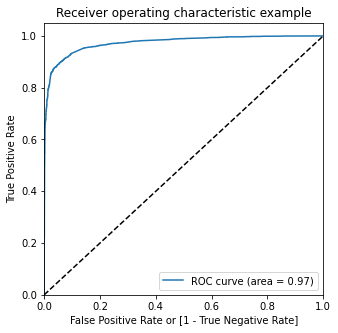

In [213]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probab)

We can see that area under curve is 0.97 which is close to 1 and henc we can say the model designd is good.

# Finding Optimal Cutoff Point

In [214]:
num=[x/10 for x in range(10)]
num

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [216]:
# Let's create columns with different probability cutoffs 
for i in num:
    y_train_pred_final[i]=y_train_pred_final.Converted_probab.apply(lambda x:1 if x>i else 0)
y_train_pred_final

,Converted,Converted_probab,customer-id,Predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.004221,7112,0,1,0,0,0,0,0,0,0,0,0
1,1,0.960159,4743,1,1,1,1,1,1,1,1,1,1,1
2,1,0.998980,7987,1,1,1,1,1,1,1,1,1,1,1
3,0,0.020685,1284,0,1,0,0,0,0,0,0,0,0,0
4,0,0.177854,7345,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0,0.042418,368,0,1,0,0,0,0,0,0,0,0,0
6347,1,0.973540,82,1,1,1,1,1,1,1,1,1,1,1
6348,0,0.027946,8200,0,1,0,0,0,0,0,0,0,0,0
6349,0,0.019460,7077,0,1,0,0,0,0,0,0,0,0,0


In [222]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
for i in num:
    cm=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total=sum(sum(cm))
    accuracy=(cm[0,0]+cm[1,1])/total
    sensi=cm[1,1]/(cm[1,1]+cm[1,0])
    speci=cm[0,0]/(cm[0,0]+cm[0,1])
    cutoff.loc[i]=[i,accuracy,sensi,speci]
cutoff

,prob,accuracy,sensi,speci
0.0,0.0,0.383247,1.000000,0.000000
0.1,0.1,0.841127,0.970419,0.760786
0.2,0.2,0.894347,0.953164,0.857799
0.3,0.3,0.921115,0.914133,0.925453
0.4,0.4,0.925051,0.898110,0.941792
0.5,0.5,0.928200,0.878800,0.958897
0.6,0.6,0.930247,0.859491,0.974215
0.7,0.7,0.915604,0.808135,0.982384
0.8,0.8,0.907889,0.781019,0.986725
0.9,0.9,0.890883,0.729663,0.991065


<AxesSubplot:xlabel='prob'>

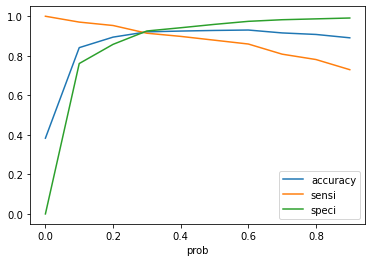

In [223]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff.plot.line(x='prob',y=['accuracy','sensi','speci'])

# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [224]:
y_train_pred_final['final_predited']=y_train_pred_final['Converted_probab'].apply(lambda x:1 if x>0.3 else 0)

In [225]:
y_train_pred_final

,Converted,Converted_probab,customer-id,Predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predited
0,0,0.004221,7112,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.960159,4743,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.998980,7987,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.020685,1284,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.177854,7345,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0,0.042418,368,0,1,0,0,0,0,0,0,0,0,0,0
6347,1,0.973540,82,1,1,1,1,1,1,1,1,1,1,1,1
6348,0,0.027946,8200,0,1,0,0,0,0,0,0,0,0,0,0
6349,0,0.019460,7077,0,1,0,0,0,0,0,0,0,0,0,0


In [226]:
#checking the accuracy:
accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['final_predited'])

0.9211147850732169

In [227]:
#creating confusion matrix w.r.t final predicted:
confusion1=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['final_predited'])
confusion1

array([[3625,  292],
       [ 209, 2225]], dtype=int64)

In [228]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [229]:
#checking the sensitivity:
TP/float(TP+FN)

0.9141331142152835

In [230]:
#checking the specificity:
TN/float(TN+FP)

0.9254531529231554

In [231]:
# Calculate false postive rate - predicting converted when customer does not have converted
FP/float(TN+FP)

0.07454684707684453

In [232]:
#calculate the predicted positive rate:
TP/float(TP+FP)

0.8839888756456099

In [233]:
#calculate the predicted negative rate:
TN/float(TN+FN)

0.9454877412623891

# Precision and Recall

In [236]:
#calculating the precison
TP/float(TP+FP)

0.8839888756456099

In [237]:
#calculating the recall
TP/float(TP+FN)

0.9141331142152835

In [238]:
precision_score(y_train_pred_final['Converted'],y_train_pred_final['final_predited'])

0.8839888756456099

In [239]:
recall_score(y_train_pred_final['Converted'],y_train_pred_final['final_predited'])

0.9141331142152835

# Precision and recall tradeoff

In [242]:
p,r,thresholds = precision_recall_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probab)

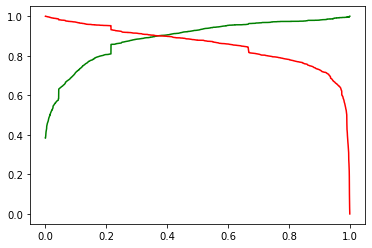

In [243]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

In [248]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source__Direct Traffic,Lead Source__Google,Lead Source__Live Chat,Lead Source__Olark Chat,Lead Source__Organic Search,Lead Source__Reference,Lead Source__Referral Sites,Lead Source__Social Media,Lead Source__Welingak Website,Last Activity__Converted to Lead,Last Activity__Email Bounced,Last Activity__Email Link Clicked,Last Activity__Email Opened,Last Activity__Form Submitted on Website,Last Activity__Olark Chat Conversation,Last Activity__Page Visited on Website,Last Activity__SMS Sent,"Specialization__Banking, Investment And Insurance",Specialization__Business Administration,Specialization__E-Business,Specialization__E-COMMERCE,Specialization__International Business,Specialization__Management,Specialization__Media and Advertising,Specialization__Rural and Agribusiness,Specialization__Services Excellence,Specialization__Travel and Tourism,Tags__Busy,Tags__Closed by Horizzon,Tags__Interested in other courses,Tags__Lost to EINS,Tags__Not Selected,Tags__Ringing,Tags__Will revert after reading the email,Last Notable Activity__Email Link Clicked,Last Notable Activity__Email Opened,Last Notable Activity__Modified,Last Notable Activity__Olark Chat Conversation,Last Notable Activity__Page Visited on Website,Last Notable Activity__SMS Sent
4697,0,-0.401656,-0.734566,-0.165577,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5540,0,-0.097360,-0.304417,-0.411240,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
5514,1,4.467093,-0.730906,1.062740,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1345,0,2.337015,0.228236,4.256362,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4096,1,-0.705953,0.023228,-0.656903,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [247]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [250]:
X_test=X_test[cols]

In [251]:
X_test_sm=sm.add_constant(X_test)

In [252]:
y_test_pred=res.predict(X_test_sm)
y_test_pred.head()

4697    0.005670
5540    0.989424
5514    0.010072
1345    0.699088
4096    0.022192
dtype: float64

In [253]:
#creating a dataframe based on actual y_test vlaue,predicted test value
y_test_pred_final=pd.DataFrame({'Converted':y_test,'Converted_probab':y_test_pred,'customer-id':y_test.index})
y_test_pred_final.reset_index(drop=True,inplace=True)
y_test_pred_final

,Converted,Converted_probab,customer-id
0,0,0.005670,4697
1,1,0.989424,5540
2,0,0.010072,5514
3,1,0.699088,1345
4,0,0.022192,4096
...,...,...,...
2717,1,0.996202,6332
2718,1,0.818148,4604
2719,1,0.703160,377
2720,0,0.004265,5786


In [325]:
#creating lead_score col to identify the hot leads
y_test_pred_final['final_predicted']=y_test_pred_final.Converted_probab.apply(lambda x:1 if x>0.37 else 0)
y_test_pred_final['Lead_Score']=y_test_pred_final['Converted_probab'].apply(lambda x:round(x*100))
y_test_pred_final.head()

,Converted,Converted_probab,customer-id,final_predicted,Lead_Score
0,0,0.005670,4697,0,1
1,1,0.989424,5540,1,99
2,0,0.010072,5514,0,1
3,1,0.699088,1345,1,70
4,0,0.022192,4096,0,2


In [259]:
#checking how many actual one present in the test dataset matches with predicted 1's
check_df=y_test_pred_final.loc[y_test_pred_final['Converted']==1,['Converted','final_predicted']]

In [262]:
check_df['final_predicted'].value_counts(normalize=True)

1    0.909715
0    0.090285
Name: final_predicted, dtype: float64

we can see that 90% of 1's predicted matches with the actual 1's.Thus,the model is behaving quitte well.

In [264]:
# Let's check the overall accuracy.
accuracy_score(y_test_pred_final['Converted'],y_test_pred_final['final_predicted'])

0.9239529757531227

In [266]:
test_matrix=confusion_matrix(y_test_pred_final['Converted'],y_test_pred_final['final_predicted'])

In [267]:
TP=test_matrix[1,1] #true positive
FP=test_matrix[0,1] #FALSE POSITIVE
TN=test_matrix[0,0] #TRUE NEGATIVE
FN=test_matrix[1,0] #FALSE NEGATIVE

In [268]:
#checking the sensitivity:
TP/(FN+TP)

0.9097154072620216

In [269]:
#checking the specificity:
TN/(FP+TN)

0.9324721080446271

In [270]:
precision_score(y_test_pred_final['Converted'],y_test_pred_final['final_predicted'])

0.8896353166986565

In [271]:
recall_score(y_test_pred_final['Converted'],y_test_pred_final['final_predicted'])

0.9097154072620216

Conclusions:
We have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, however we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
Accuracy, Sensitivity and Specificity values of test set are around 92%, 90% and 93% which are approximately closer to the respective values calculated using trained set.
Also the lead score calculated can be used by the business and they can make decission to call the hot leads who have the higher rate of conversions.
Hence overall this model seems to be good.